In [1]:
import random 
from env import StaticGridEnv
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sn
import utils

#seeding for reproducibility
random.seed(42)

#environment variables
numActions = 4
validActions = [0, 1, 2, 3]
numStates = 10*10 #10x10 grid



pygame 2.6.1 (SDL 2.30.7, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plotCumulativeReward(cumulativeReward):
    plt.plot(cumulativeReward)
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward vs Episodes')
    plt.show()

def calculateSuccessRate(numSuccess, numEpisodes):
    successRate = (numSuccess / numEpisodes) * 100
    return successRate
    
    
def calculateAverageLearningSpeed(stepsPerEpisode):
    averageLearningSpeed = 1 / np.mean(stepsPerEpisode)
    return averageLearningSpeed

def calculateAverageRewardPerEpisode(totalRewardsPerEpisode):
    averageRewardPerEpisode = np.mean(totalRewardsPerEpisode)
    return averageRewardPerEpisode

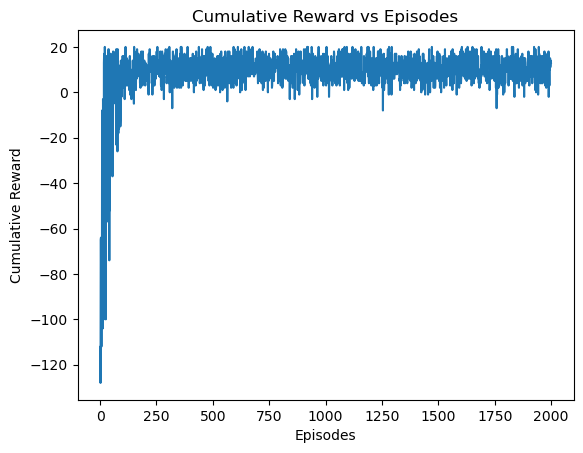

Total Rewards per Episode:  [-124, -112, -128, -65, -64, -100, -112, -100, -100, -8, -55, -36, -104, -3, -10, -7, -100, 13, 17, -33, -18, 20, 14, -26, 14, -100, -55, 11, -10, 16, -1, 2, 4, 13, 15, 8, -57, 19, 19, -13, 15, -74, 17, -52, 12, -5, 9, 17, 17, 16, -25, 13, 14, 8, 8, -37, -23, -16, 18, 15, 11, 0, 6, 13, 10, 8, 3, 13, -5, 18, 17, -23, 19, 12, 7, 15, 13, -26, 19, 11, 14, -18, 12, 8, -16, 4, 3, -13, 9, 9, -15, -12, 10, 14, 10, -2, 13, 10, 7, 8, 16, 8, 2, 12, 4, 10, 7, 16, 9, -3, 10, 10, 11, 20, 4, 3, 13, 11, 13, 15, 5, 3, 13, 13, 8, 11, 10, 10, 14, 1, 7, 11, 16, -1, 0, 10, 6, 9, 4, -3, 9, 6, 2, 10, 7, 14, 7, 1, 8, 4, -5, 20, 13, 12, 9, 14, 5, 9, 10, 1, 14, 18, 6, 8, 19, 15, 10, 11, 14, 11, 17, 8, 9, 7, 14, 13, 11, 4, 16, 2, 12, 6, 8, 18, 12, 13, 15, 8, 3, 6, 18, 5, 13, 12, 8, 9, 14, 7, 5, 13, 3, 13, 12, 5, 11, 10, 8, 12, 11, 10, 5, 11, 3, 5, 5, -1, 17, 6, 4, 8, 19, 11, 9, 12, 16, 9, 10, 11, 10, 13, 12, 5, -1, 4, 16, 7, 15, 7, 5, 6, 16, 3, 10, 7, 10, 10, 7, 6, 10, 15, 11, 18, 8, 

In [3]:
# Initialize the environment
envQ = StaticGridEnv(42)


q = np.zeros((numStates, numActions))

# Params
epsilonQ = 0.1
alphaQ = 0.8    # Learning rate
gammaQ = 0.95   # Discount factor
numEpisodesQ = 2000
maxStepsPerEpisodeQ = 100


# Metrics
totalRewardsPerEpisodeQ = []
stepsPerEpisodeQ = []
successfulEpisodesQ = 0

for episodeQ in range(numEpisodesQ):
    
    twoDimStateQ = envQ.reset()
    stateQ = twoDimStateQ[0]*10 + twoDimStateQ[1]
    doneQ = False
    totalRewardsQ = 0
    stepsQ = 0
    actionQ = 0
    
    
    for stepQ in range(maxStepsPerEpisodeQ):
        # Choose an action (epsilon-greedy policy)
        if random.uniform(0, 1) > epsilonQ: # Exploit
            actionQ =  np.argmax(q[stateQ, :])
        else: # Explore
            actionQ = random.choice(validActions)

        # Take the action
        nextStateTwoDimQ, rewardQ, doneQ, _ = envQ.step(actionQ)
        nextStateQ = nextStateTwoDimQ[0]*10 + nextStateTwoDimQ[1]

        # Update Q-table
        q[stateQ, actionQ] = q[stateQ, actionQ] + alphaQ * (rewardQ + gammaQ * np.max(q[nextStateQ, :]) - q[stateQ, actionQ])

        # Update metrics
        totalRewardsQ += rewardQ
        stepsQ += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twoDimStateQ = nextStateTwoDimQ
        stateQ = nextStateQ

        if doneQ:
            successfulEpisodesQ += 1
            break

    # Track metrics
    totalRewardsPerEpisodeQ.append(totalRewardsQ)
    stepsPerEpisodeQ.append(stepsQ)


# Calculate metrics
successRateQ = calculateSuccessRate(successfulEpisodesQ, numEpisodesQ)
averageRewardPerEpQ = calculateAverageRewardPerEpisode(totalRewardsPerEpisodeQ)
averageLearningSpeedQ = calculateAverageLearningSpeed(stepsPerEpisodeQ)

# Save metrics to a JSON file
metrics = {
    "Success Rate": successRateQ,
    "Average Reward per Episode": averageRewardPerEpQ,
    "Average Learning Speed": averageLearningSpeedQ,
}

with open("metricsQ.json", "w") as fQ:
    json.dump(metrics, fQ, indent=4)

# Plot cumulative reward
plotCumulativeReward(totalRewardsPerEpisodeQ)

# Print metrics
print("Total Rewards per Episode: ", totalRewardsPerEpisodeQ)
print("Steps per Episode: ", stepsPerEpisodeQ)
print("Number of Successful Episodes: ", successfulEpisodesQ)

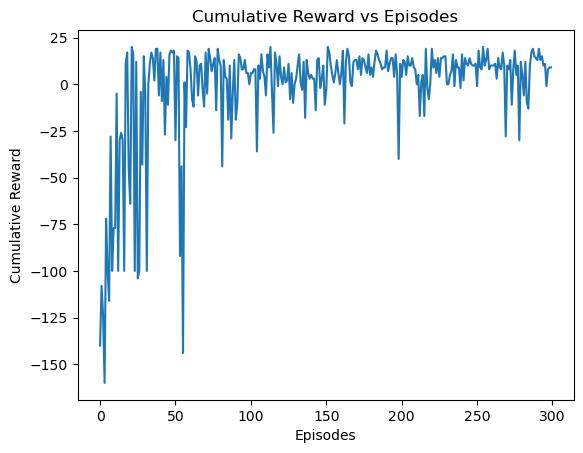

Total Rewards per Episode:  [-140, -108, -124, -160, -72, -100, -116, -28, -100, -77, -77, -5, -100, -30, -26, -30, -100, 11, 17, -46, -64, 20, 16, -100, 12, -104, -100, -4, -43, 15, -5, -100, 0, 11, 17, 14, 2, 19, 19, -6, 17, -9, 13, -27, 4, -11, 16, 18, 17, 18, -30, 15, 14, -92, -44, -144, 1, -23, 18, 17, 8, -8, -12, 15, 12, -6, 10, 11, -3, -12, 17, -5, 19, 14, 7, 11, 14, -14, 19, 13, 10, -44, 13, 4, 3, -19, 10, -29, -4, 13, -19, -10, 16, 14, 8, 8, 13, 6, 6, 0, 6, 6, 8, 8, -36, 10, 3, 16, 7, 4, -6, 16, 9, 20, -4, -26, 17, 11, -1, 15, 4, 0, 9, 1, 2, 11, -8, 6, -10, 0, 3, 10, 16, 1, -3, 12, -18, 13, 6, 3, 5, 3, 3, -14, 13, 14, -2, 3, 10, -11, -3, 20, 17, 10, 5, 1, 6, 13, 6, 0, 6, 18, -21, 12, 19, 15, 1, -1, 12, 13, 13, 8, 15, 5, 14, 13, 9, 6, 16, 5, 9, 4, 12, 18, 16, 13, 11, 8, 9, 9, 18, 7, 11, 14, 14, 4, 16, 5, -40, 11, 4, 13, 12, 5, 15, 10, 10, 14, 9, 8, 0, 5, -17, 1, 5, -17, 19, -2, -8, 1, 19, 9, 13, 6, 14, 4, 14, 14, 15, 15, 0, 0, 5, 7, 16, -1, 13, 9, 9, -2, 16, 2, 14, 11, 10, 14, 

In [4]:


envS = StaticGridEnv(42)


sarsa = np.zeros((numStates, numActions))


# Params
epsilonS = 0.1
alphaS = 0.8    # Learning rate
gammaS = 0.95   # Discount factor
maxEpisodesS = 300
maxStepsPerEpisodeS = 100


# Metrics
totalRewardsPerEpisodeS = []
stepsPerEpisodeS = []
successfulEpisodesS = 0

for episodeS in range(maxEpisodesS):

    twoDimStateS = envS.reset()
    stateS = twoDimStateS[0]*10 + twoDimStateS[1]
    doneS = False
    totalRewardsS = 0
    stepsS = 0
    actionS = 0
    nextActionS = 0
    
    
    # Choose an action (epsilon-greedy policy)
    if random.uniform(0, 1) > epsilonS: # Exploit
        actionS =  np.argmax(sarsa[stateS, :])
    else: # Explore
        actionS = random.choice(validActions)
    
    for stepS in range(maxStepsPerEpisodeS):
        

        # Take the action
        nextStateTwoDimS, rewardS, doneS, _ = envS.step(actionS)
        nextStateS = nextStateTwoDimS[0]*10 + nextStateTwoDimS[1]
        
        if random.uniform(0, 1) > epsilonS: # Exploit
            nextActionS =  np.argmax(sarsa[nextStateS, :])
        else: # Explore
            nextActionS = random.choice(validActions)

        # Update Q-table
        sarsa[stateS, actionS] = sarsa[stateS, actionS] + alphaS * (rewardS + gammaS * sarsa[nextStateS, nextActionS] - sarsa[stateS, actionS])

        # Update metrics
        totalRewardsS += rewardS
        stepsS += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twoDimStateS = nextStateTwoDimS
        stateS = nextStateS
        actionS = nextActionS

        if doneS:
            successfulEpisodesS += 1
            break

    # Track metrics
    totalRewardsPerEpisodeS.append(totalRewardsS)
    stepsPerEpisodeS.append(stepsS)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    



# Close the environment
#envS.close()

# Calculate metrics
successRateS = calculateSuccessRate(successfulEpisodesS, maxEpisodesS)
averageRewardPerEpisodeS = calculateAverageRewardPerEpisode(totalRewardsPerEpisodeS)
averageLearningSpeedS = calculateAverageLearningSpeed(stepsPerEpisodeS)

# Save metrics to a JSON file
metricsS = {
    "Success Rate": successRateS,
    "Average Reward per Episode": averageRewardPerEpisodeS,
    "Average Learning Speed": averageLearningSpeedS,
}

with open("metricsS.json", "w") as fS:
    json.dump(metricsS, fS, indent=4)
    
# Plot cumulative reward
plotCumulativeReward(totalRewardsPerEpisodeS)

# Print metrics
print("Total Rewards per Episode: ", totalRewardsPerEpisodeS)
print("Steps per Episode: ", stepsPerEpisodeS)
print("Number of Successful Episodes: ", successfulEpisodesS)


In [5]:
def provideTeacherAdvice(teacherTable, currentState, availability, accuracy):
    correctAction = np.argmax(teacherTable[currentState, :])
    otherActions = [0, 1, 2, 3]
    otherActions.remove(correctAction)
    possibleAction = random.choice(otherActions)
    if random.uniform(0, 1) < availability:
        if random.uniform(0, 1) < accuracy:
            return correctAction
        else:
            return possibleAction
    else:
        return -1
    

availability = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy = [0.2, 0.4, 0.6, 0.8, 1.0]

,Availability,Accuracy,Avg Reward,Success Rate (%),Avg Learning Speed
0,0.2,0.2,-139.7160,0.10,0.010010
1,0.2,0.4,-137.8065,0.50,0.010049
2,0.2,0.6,-136.8710,0.55,0.010054
3,0.2,0.8,-134.1035,1.35,0.010134
4,0.2,1.0,-137.9715,1.15,0.010114
5,0.4,0.2,-133.0990,0.25,0.010024
6,0.4,0.4,-125.9050,0.90,0.010089
7,0.4,0.6,-117.8840,2.75,0.010266
8,0.4,0.8,-110.7260,6.70,0.010522
9,0.4,1.0,-96.7375,19.75,0.011299


,0.2,0.4,0.6,0.8,1.0
0.2,-139.716,-133.099,-132.14,-133.185,-120.5095
0.4,-137.8065,-125.905,-115.044,-90.3725,-37.13
0.6,-136.871,-117.884,-96.4515,-28.729,-0.833
0.8,-134.1035,-110.726,-49.923,-1.8585,8.1765
1.0,-137.9715,-96.7375,-15.5195,6.1195,11.8965


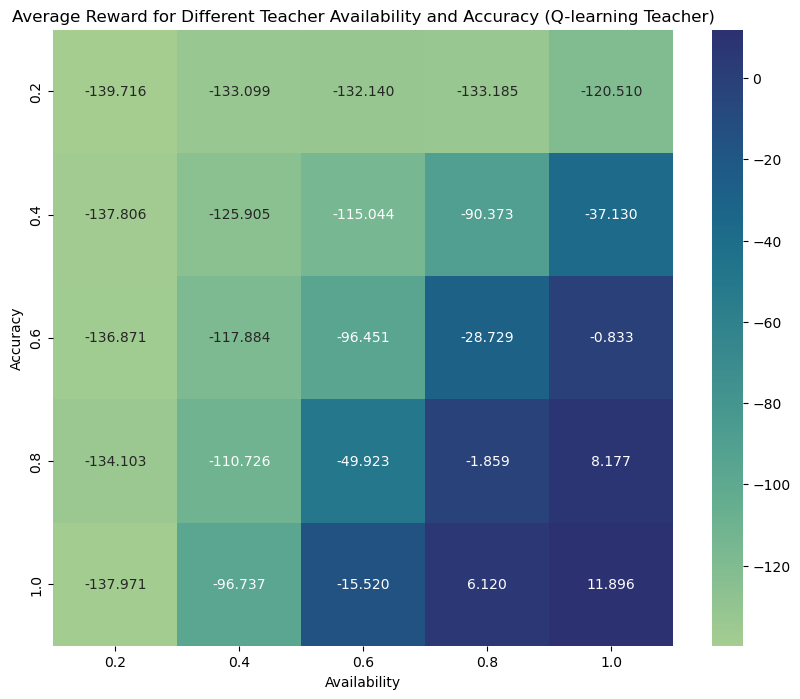

In [6]:
studentQ = np.zeros((numStates, numActions))

dataFrameQ = pd.DataFrame(columns=['Availability', 'Accuracy', 'Avg Reward', 'Success Rate (%)', 'Avg Learning Speed'])
dataFrameHeatQ = pd.DataFrame(index=accuracy, columns=availability)


def studentQTraining(a, b):
    successfulEpStudentQ = 0
    totalRewPerEpStudentQ = []
    stepsPerEpStudentQ = []
    
    for episodeStudQ in range(numEpisodesQ):
        
        twoDimStateStudQ = envQ.reset()
        stateStudQ = twoDimStateStudQ[0]*10 + twoDimStateStudQ[1]
        doneStudQ = False
        totalRewardsStudQ = 0
        stepsStudQ = 0
        actionStudQ = 0
            
        for stepStudQ in range(maxStepsPerEpisodeQ):
            # Ask teacher
            actionStudQ = provideTeacherAdvice(q, stateStudQ, a, b)
            # If no advice is provided, choose an action (epsilon-greedy policy)
            if actionStudQ == -1:
                if random.uniform(0, 1) > epsilonQ: # Exploit
                    actionStudQ =  np.argmax(studentQ[stateStudQ, :])
                else: # Explore
                    actionStudQ = random.choice(validActions)
                
            # Take the action
            nextStateTwoDimStudQ, rewardStudQ, doneStudQ, _ = envQ.step(actionStudQ)
            nextStateStudQ = nextStateTwoDimStudQ[0]*10 + nextStateTwoDimStudQ[1]

            # Update Q-table
            studentQ[stateStudQ, actionStudQ] = studentQ[stateStudQ, actionStudQ] 
            + alphaQ * (rewardStudQ + gammaQ * np.max(studentQ[nextStateStudQ, :]) - studentQ[stateStudQ, actionStudQ])

            # Update metrics
            totalRewardsStudQ += rewardStudQ
            stepsStudQ += 1

            # Render the environment (optional)
            #env.render(episode=episode, learning_type="Q-learning")

            # Transition to the next state
            twoDimStateStudQ = nextStateTwoDimStudQ
            stateStudQ = nextStateStudQ

            if doneStudQ:
                successfulEpStudentQ += 1
                break

            # Track metrics
        totalRewPerEpStudentQ.append(totalRewardsStudQ)
        stepsPerEpStudentQ.append(stepsStudQ)

        
    successRateStudQ = calculateSuccessRate(successfulEpStudentQ, numEpisodesQ)
    averageRewardPerEpStudQ = calculateAverageRewardPerEpisode(totalRewPerEpStudentQ)
    averageLearningSpeedStudQ = calculateAverageLearningSpeed(stepsPerEpStudentQ)
    
    
    dataFrameQ.loc[len(dataFrameQ)] = [a, b, averageRewardPerEpStudQ, successRateStudQ, averageLearningSpeedStudQ]
    # flip b and a because index is accuracy and column is availability
    dataFrameHeatQ.loc[b,a] = averageRewardPerEpStudQ
    

for a in availability:
    for b in accuracy:
        studentQTraining(a, b)

envQ.close()

display(dataFrameQ)
display(dataFrameHeatQ)

#save the dataframes to csv
dataFrameQ.to_csv('dataFrameQlearning.csv', index=False)


# Convert the data frame to numeric values for heatmap
dataFrameHeatQ = dataFrameHeatQ.apply(pd.to_numeric)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(dataFrameHeatQ, annot=True, fmt=".3f", cmap="crest")
plt.title("Average Reward for Different Teacher Availability and Accuracy (Q-learning Teacher)")
plt.xlabel("Availability")
plt.ylabel("Accuracy")
plt.show()


,Availability,Accuracy,Avg Reward,Success Rate (%),Avg Learning Speed
0,0.2,0.2,-144.346667,0.000000,0.010000
1,0.2,0.4,-135.960000,0.000000,0.010000
2,0.2,0.6,-138.183333,0.666667,0.010065
3,0.2,0.8,-132.903333,0.666667,0.010061
4,0.2,1.0,-127.406667,1.666667,0.010166
5,0.4,0.2,-132.710000,0.333333,0.010033
6,0.4,0.4,-126.560000,1.666667,0.010166
7,0.4,0.6,-119.333333,0.666667,0.010066
8,0.4,0.8,-111.833333,5.000000,0.010395
9,0.4,1.0,-96.380000,14.666667,0.011050


,0.2,0.4,0.6,0.8,1.0
0.2,-144.346667,-132.71,-129.193333,-135.073333,-116.98
0.4,-135.96,-126.56,-118.223333,-96.83,-48.68
0.6,-138.183333,-119.333333,-95.316667,-40.533333,-4.6
0.8,-132.903333,-111.833333,-59.516667,-8.753333,2.426667
1.0,-127.406667,-96.38,-27.813333,-6.066667,-4.67


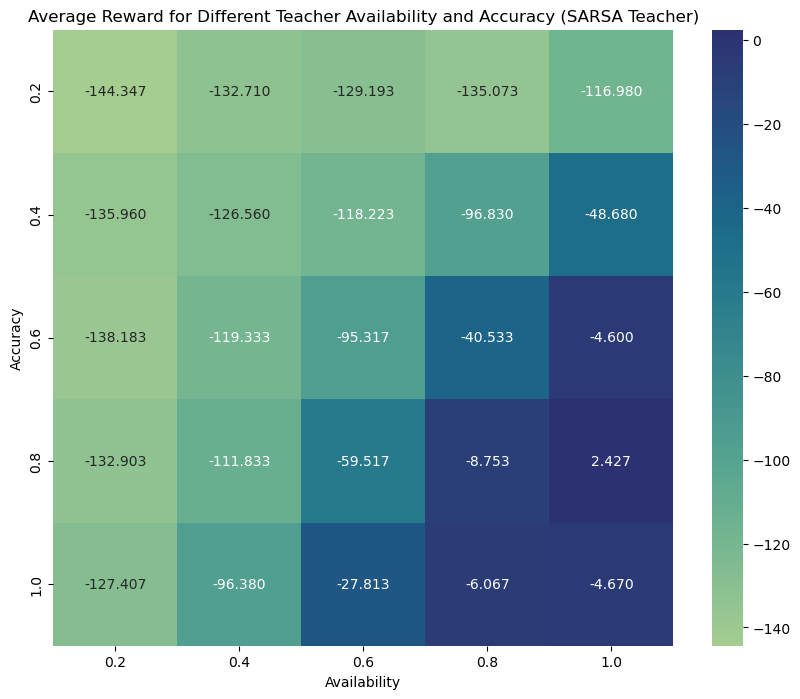

In [7]:
studentSarsa = np.zeros((numStates, numActions))

dataFrameSarsa = pd.DataFrame(columns=['Availability', 'Accuracy', 'Avg Reward', 'Success Rate (%)', 'Avg Learning Speed'])
dataFrameHeatSarsa = pd.DataFrame(index=accuracy, columns=availability)

def studentSarsaTraining(a,b):
    # Metrics
    totalRewardsPerEpStudS = []
    stepsPerEpStudS = []
    successfulEpStudS = 0

    for episodeStudS in range(maxEpisodesS):
        
        twoDimStateStudS = envS.reset()
        stateStudS = twoDimStateStudS[0]*10 + twoDimStateStudS[1]
        doneStudS = False
        totalRewardsStudS = 0
        stepsStudS = 0
        actionStudS = 0
        nextActionStudS = 0
        
        # Ask teacher for advice
        actionStudS = provideTeacherAdvice(sarsa, stateStudS, a, b)
        # If no advice is provided, choose an action (epsilon-greedy policy)
        if actionStudS == -1:
            if random.uniform(0, 1) > epsilonS: # Exploit
                actionStudS =  np.argmax(studentSarsa[stateStudS, :])
            else: # Explore
                actionStudS = random.choice(validActions)
        
        for stepsStudS in range(maxStepsPerEpisodeS):
            

            # Take the action
            nextStateTwoDimStudS, rewardStudS, doneStudS, _ = envS.step(actionStudS)
            nextStateStudS = nextStateTwoDimStudS[0]*10 + nextStateTwoDimStudS[1]
            
            
            # Ask teacher for advice
            nextActionStudS = provideTeacherAdvice(sarsa, nextStateStudS, a, b)
            # If no advice is provided, choose an action (epsilon-greedy policy)
            if nextActionStudS == -1:
                if random.uniform(0, 1) > epsilonS: # Exploit
                    nextActionStudS =  np.argmax(studentSarsa[nextStateStudS, :])
                else: # Explore
                    nextActionStudS = random.choice(validActions)

            # Update Q-table
            studentSarsa[stateStudS, actionStudS] = studentSarsa[stateStudS, actionStudS] 
            + alphaS * (rewardStudS + gammaS * studentSarsa[nextStateStudS, nextActionStudS] - studentSarsa[stateStudS, actionStudS])

            # Update metrics
            totalRewardsStudS += rewardStudS
            stepsStudS += 1

            # Render the environment (optional)
            #env.render(episode=episode, learning_type="Q-learning")

            # Transition to the next state
            twoDimStateStudS = nextStateTwoDimStudS
            stateStudS = nextStateStudS
            actionStudS = nextActionStudS

            if doneStudS:
                successfulEpStudS += 1
                break

        # Track metrics
        totalRewardsPerEpStudS.append(totalRewardsStudS)
        stepsPerEpStudS.append(stepsStudS)
        

    # Calculate metrics
    successRateStudS = calculateSuccessRate(successfulEpStudS, maxEpisodesS)
    averageRewardPerEpStudS = calculateAverageRewardPerEpisode(totalRewardsPerEpStudS)
    averageLearningSpeedStudS = calculateAverageLearningSpeed(stepsPerEpStudS)
    
    dataFrameSarsa.loc[len(dataFrameSarsa)] = [a, b, averageRewardPerEpStudS, successRateStudS, averageLearningSpeedStudS]
    # flip b and a because index is accuracy and column is availability
    dataFrameHeatSarsa.loc[b,a] = averageRewardPerEpStudS
        
        
for a in availability:
    for b in accuracy:
        studentSarsaTraining(a, b)

envS.close()

display(dataFrameSarsa)
display(dataFrameHeatSarsa)

# Save the dataframes to csv
dataFrameSarsa.to_csv('dataFrameSarsa.csv', index=False)

# Convert the data frame to numeric values for heatmap
dataFrameHeatSarsa = dataFrameHeatSarsa.apply(pd.to_numeric)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(dataFrameHeatSarsa, annot=True, fmt=".3f", cmap="crest")
plt.title("Average Reward for Different Teacher Availability and Accuracy (SARSA Teacher)")
plt.xlabel("Availability")
plt.ylabel("Accuracy")
plt.show()


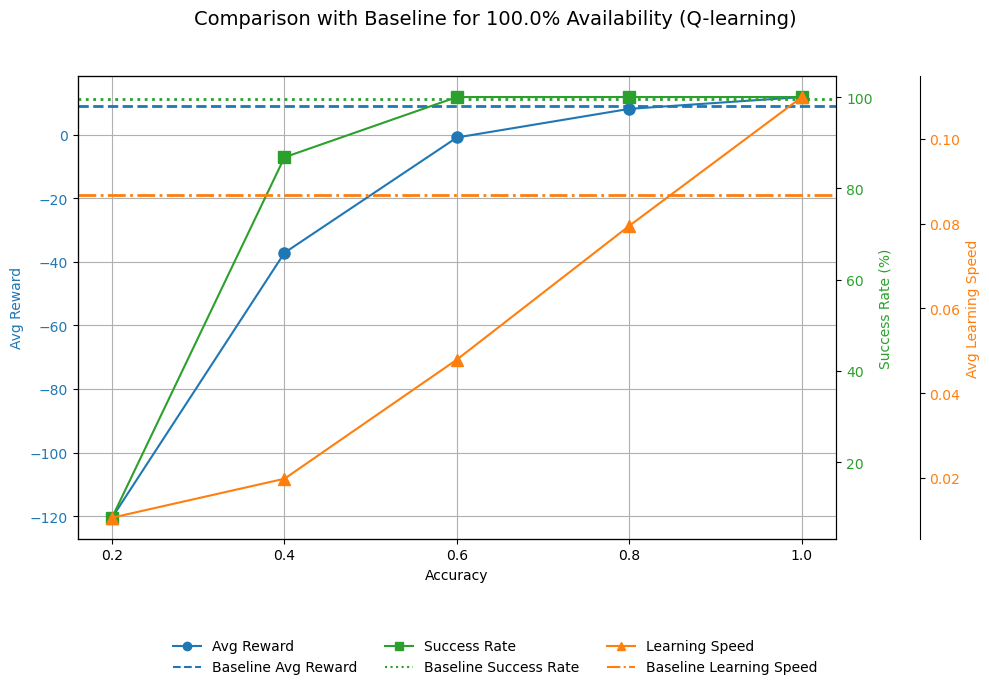

In [8]:
dfLoadQ = pd.read_csv('dataFrameQlearning.csv')


# Open and read the JSON file
with open('metricsQ.json', 'r') as file:
    baseQ = json.load(file)
baseQTuple = (baseQ['Average Reward per Episode'], baseQ['Success Rate'], baseQ['Average Learning Speed'])

utils.plot_comparison_with_baseline(availability=1.0, df_learning=dfLoadQ, baseline_learning=baseQTuple, algorithm='Q-learning')

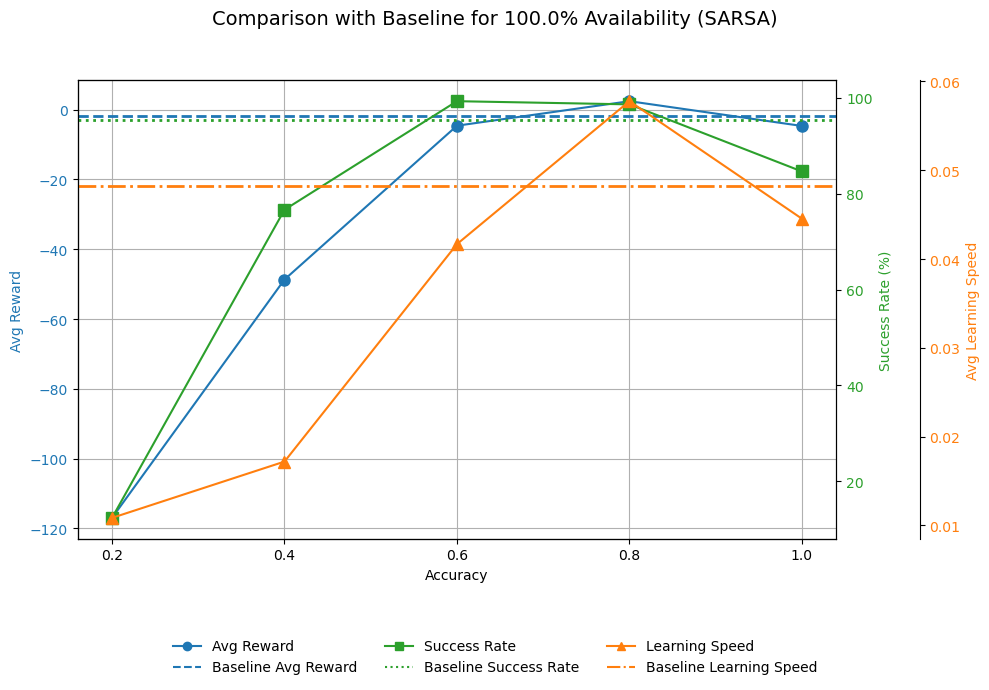

In [9]:
dfLoadSarsa = pd.read_csv('dataFrameSarsa.csv')

with open('metricsS.json', 'r') as file:
    baseS = json.load(file)
    baseSTuple = (baseS['Average Reward per Episode'], baseS['Success Rate'], baseS['Average Learning Speed'])

utils.plot_comparison_with_baseline(availability=1.0, df_learning=dfLoadSarsa, baseline_learning=baseSTuple, algorithm='SARSA')